# Airbnb Prices in Some of The Most Popular European Cities

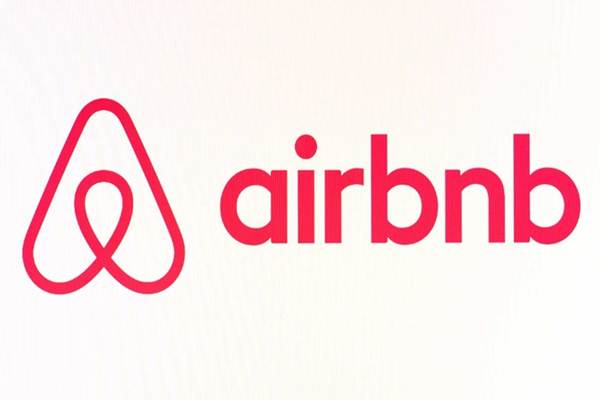

<h3 align="left">About dataset </h3>:

This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends. We hope that this data set offers insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability!

**Dataset Column description**:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| realSum | The total price of the Airbnb listing | (Numeric) |
| room_type | The type of room being offered (e.g. private, shared, etc.) | (Categorical) |
| room_shared | Whether the room is shared or not | (Boolean) |
| room_private | Whether the room is private or not | (Boolean) |
| person_capacity | The maximum number of people that can stay in the room | (Numeric) |
| host_is_superhost	| Whether the host is a superhost or not | (Boolean) |
| multi | Whether the listing is for multiple rooms or not | (Boolean) |
| biz | Whether the listing is for business purposes or not | (Boolean) |
| cleanliness_rating | The cleanliness rating of the listing | (Numeric) |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | (Numeric) |
| bedrooms | The number of bedrooms in the listing | (Numeric) |
| dist | The distance from the city centre | (Numeric) |
| metro_dist | The distance from the nearest metro station | (Numeric) |
| lng | The longitude of the listing | (Numeric) |
| lat | The latitude of the listing | (Numeric) |

Source:

https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## Problem Statement

1. How does total listings affect business purposes?
2. What types of rooms and facilities are of interest to visitors?
3. What is the status of Airbnb hosts in each city?
4. What affects the price?
5. How big is the influence of strategic location?
6. What is the best model?

## Import Package

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix

In [2]:
budapest= pd.read_csv('Budapest_airbnb.csv')
lisbon = pd.read_csv('Lisbon_airbnb.csv')
paris = pd.read_csv('Paris_airbnb.csv')

## Data Understanding

In [3]:
print(budapest.shape)
print(lisbon.shape)
print(paris.shape)

(4022, 21)
(5763, 21)
(6688, 21)


In [4]:
budapest['city']= 'Budapest'
lisbon ['city']='Lisbon'
paris ['city']= 'Paris'

In [5]:
df= pd.concat([budapest, lisbon,paris])
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,status,city
0,0,284.344597,Entire home/apt,False,False,5.0,False,1,0,9.0,...,0.532188,0.151416,255.884374,15.259588,756.998638,57.322266,19.05440,47.49377,Weekdays,Budapest
1,1,63.448794,Entire home/apt,False,False,2.0,True,0,0,10.0,...,11.715751,3.737027,25.020171,1.492070,41.889384,3.171993,19.18097,47.43755,Weekdays,Budapest
2,2,151.102129,Entire home/apt,False,False,5.0,True,0,1,10.0,...,0.786292,0.512534,227.244639,13.562852,689.651668,60.287935,19.06448,47.49989,Weekend,Budapest
3,3,178.596607,Entire home/apt,False,False,4.0,True,1,0,10.0,...,0.902166,0.344801,263.796542,15.731428,544.768148,41.251520,19.05900,47.50600,Weekdays,Budapest
4,4,208.911031,Private room,False,True,2.0,False,0,0,2.0,...,5.174894,2.121191,65.340182,3.896542,98.359510,7.448085,19.04264,47.54444,Weekdays,Budapest


In [6]:
df= df.drop('Unnamed: 0', axis= 1)
df= df.drop(['attr_index', 'attr_index_norm', 'rest_index','rest_index_norm'], axis= 1)

In [7]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,16473.000000,16473.000000,16473.00000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000,16473.000000
mean,285.800674,3.233352,0.24695,0.390518,9.353245,92.329448,1.110059,2.361654,0.474037,2.406262,44.982560
std,247.286040,1.294556,0.43125,0.487881,0.929701,8.546871,0.691105,1.751056,0.725949,10.696042,4.623942
min,34.779339,2.000000,0.00000,0.000000,2.000000,20.000000,0.000000,0.034661,0.002301,-9.226340,38.693000
25%,162.381915,2.000000,0.00000,0.000000,9.000000,90.000000,1.000000,1.044482,0.186695,-9.133230,38.725810
50%,236.974555,3.000000,0.00000,0.000000,10.000000,94.000000,1.000000,1.940771,0.296387,2.335250,47.502920
75%,333.255159,4.000000,0.00000,1.000000,10.000000,98.000000,1.000000,3.310920,0.474408,2.405340,48.859540
max,16445.614689,6.000000,1.00000,1.000000,10.000000,100.000000,10.000000,19.250412,11.687734,19.304210,48.901060


In [8]:
df.describe(include='O')

,room_type,status,city
count,16473,16473,16473
unique,3,2,3
top,Entire home/apt,Weekend,Paris
freq,12534,8412,6688


- object: 3
- bool:2
- int: 4
- float: 8

In [9]:
df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'lng', 'lat', 'status', 'city'],
      dtype='object')

## EDA

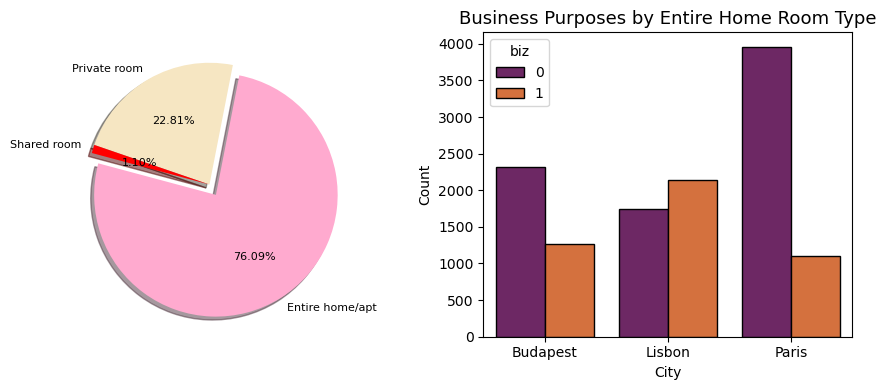

In [10]:
apt= df[df['room_type']== 'Entire home/apt']
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(9,4))

df['room_type'].value_counts().plot.pie(shadow = True, explode=[0.1, 0, 0],
                                        autopct='%.2f%%', textprops={'fontsize':8}, 
                                        startangle=165, colors=['#FFAACF', '#F6E6C2', 'r'], ax= ax1)
plt.title('Business Purposes by Entire Home Room Type', fontsize=13)
ax1.axis( 'off')

sns.countplot(x='city',hue= 'biz',data= apt, ax= ax2, palette= 'inferno', edgecolor= 'black')

ax2.set_ylabel('Count')
ax2.set_xlabel('City')
plt.tight_layout()
plt.show()


insights:
1. The most number of listings The room type is "entire home/apt,
2. In the entire home room type, Paris has a number of listings that are not for business purposes; this is reasonable. because Paris is the most visited place on the traveled city list.
3. Lisbon has the most total listings for business purposes compared to the other two cities because it is the largest industrial area and global city in Portugal. As part of the Lisbon Agenda, this is used by hosts to provide more rental places for business purposes. Airbnb itself exerted tremendous influence until the Lisbon government tackled the ongoing housing crisis.

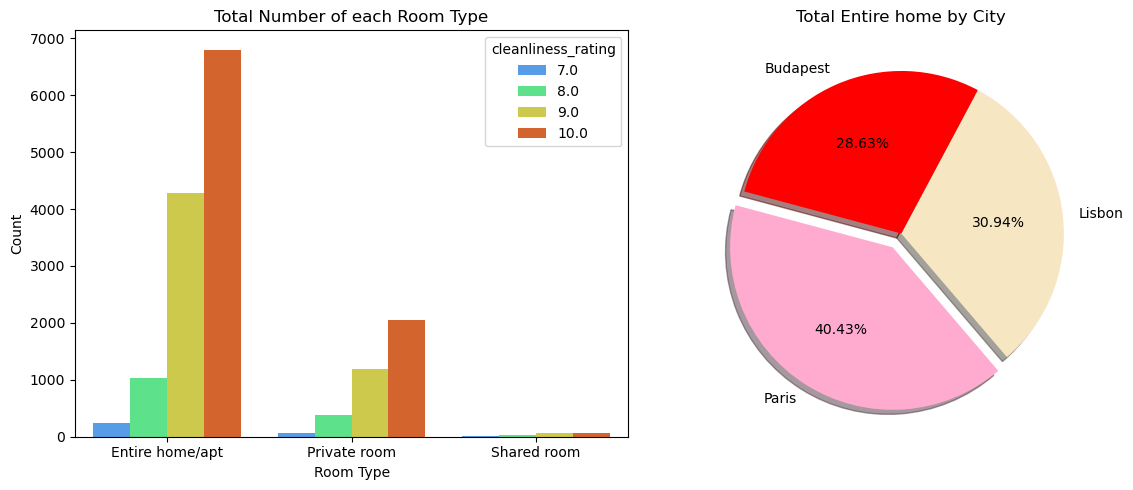

In [11]:
rat= df[df['cleanliness_rating']>=7]
entire= df[df['room_type']== 'Entire home/apt']
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=rat['room_type'],hue=rat['cleanliness_rating'] , ax= ax1, palette= 'turbo')

entire['city'].value_counts().plot.pie(shadow = True, explode=[0.1, 0, 0],
                                        autopct='%.2f%%', textprops={'fontsize':10}, 
                                        startangle=165, colors=['#FFAACF', '#F6E6C2', 'r'], ax= ax2)

ax1.set_title('Total Number of each Room Type', fontsize=12)
ax2.set_title('Total Entire home by City', fontsize=12)
ax2.axis( 'off')
ax1.set_ylabel('Count')
ax1.set_xlabel('Room Type')

plt.tight_layout()
plt.show()


insights:
>- The room type with the highest cleanliness rating is "entire home/apt."
>- The largest number of entire homes and apartments are in the city of Paris. because they are more in demand and generate more profit.

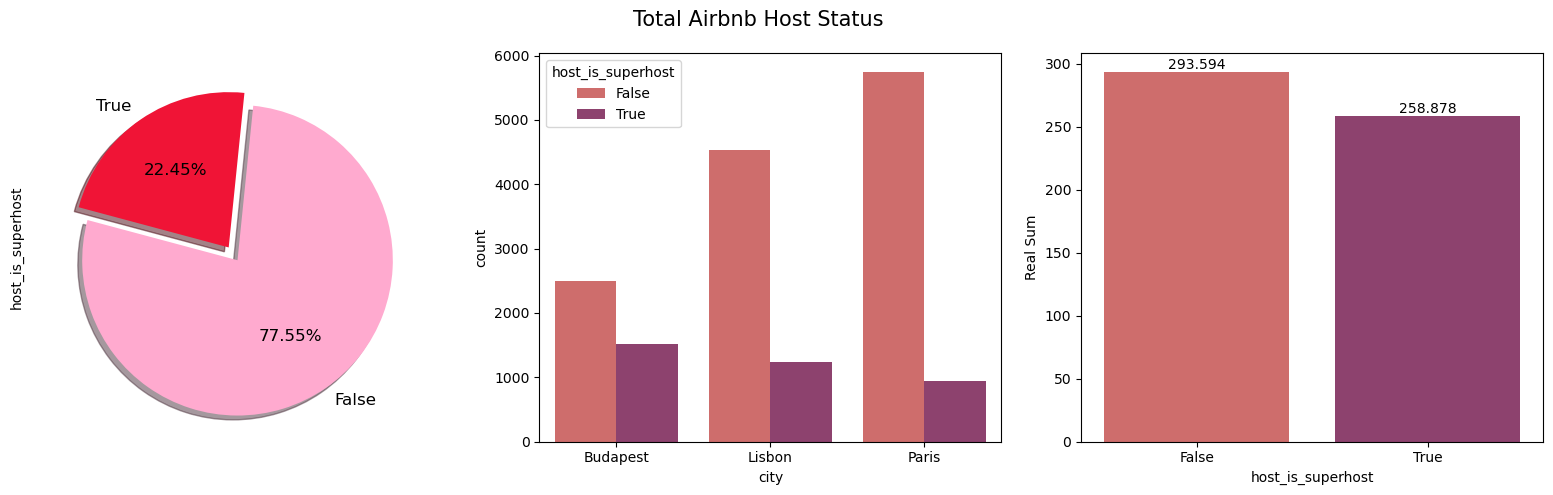

In [12]:
host= df.groupby('host_is_superhost')['realSum'].mean()
fig, (ax1,ax2, ax3)= plt.subplots(1,3, figsize=(16,5))
plt.suptitle('Total Airbnb Host Status', fontsize= 15)

df['host_is_superhost'].value_counts().plot.pie(shadow = True, explode=[0.1, 0],
                                        autopct='%.2f%%', textprops={'fontsize':12}, 
                                        startangle=165, colors=['#FFAACF', '#F01436'], ax= ax1)

sns.countplot(x= df['city'],hue= df['host_is_superhost'], ax= ax2, palette= 'flare')
sns.barplot(x= host.index, y= host.values,ax= ax3, palette= 'flare')
ax3.set_ylabel('Real Sum')
ax3.bar_label(ax3.containers[0])
plt.tight_layout();

insights:
- Airbnb hosts in each city have more host status than superhosts, but it can be seen that the number of superhosts is dominantly owned by Budapest because there is almost no regulation of Airbnbs and the tax burden is ridiculous. This can make it easier for Airbnb hosts in Budapest to get superhost status compared to the other two cities.

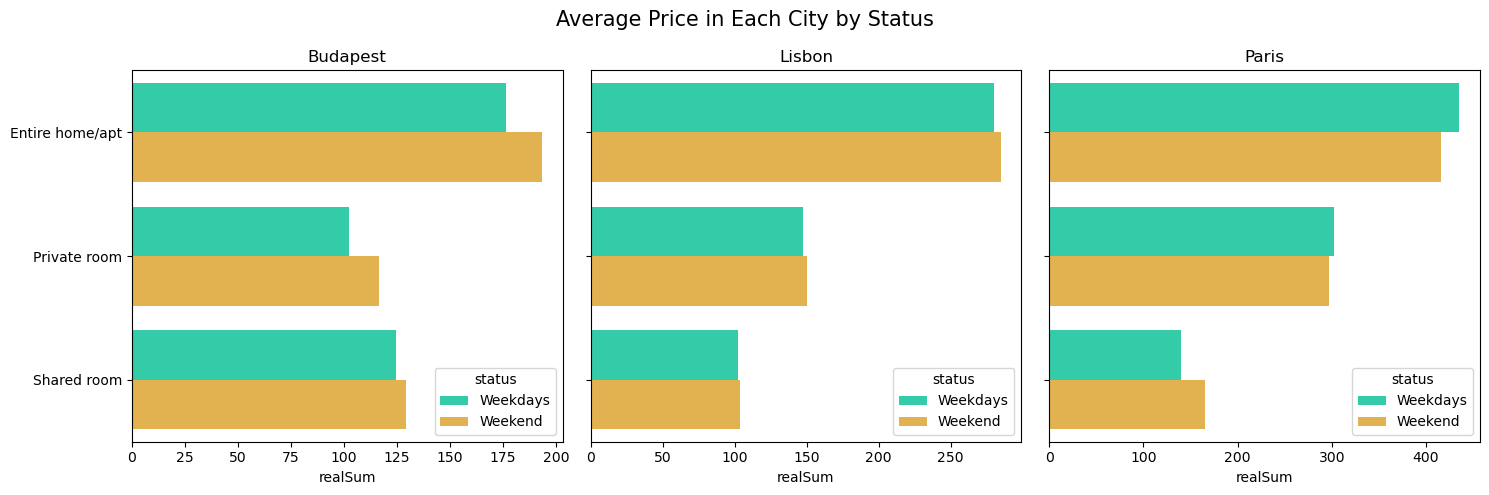

In [13]:
bdp= budapest.groupby(['room_type','status'])['realSum'].mean()
bdp= pd.DataFrame(bdp).reset_index()
lbn= lisbon.groupby(['room_type','status'])['realSum'].mean()
lbn= pd.DataFrame(lbn).reset_index()
prs= paris.groupby(['room_type','status'])['realSum'].mean()
prs= pd.DataFrame(prs).reset_index()

fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize= (15,5),sharey= True)
plt.suptitle('Average Price in Each City by Status', fontsize= 15)

sns.barplot(y='room_type', x= 'realSum', hue= 'status', data= bdp, palette='turbo', ax= ax1, orient='h')
sns.barplot(y='room_type', x= 'realSum', hue= 'status', data= lbn, palette='turbo', ax= ax2, orient= 'h')
sns.barplot(y='room_type', x= 'realSum', hue= 'status', data= prs, palette='turbo', ax= ax3, orient= 'h')

ax1.set_title('Budapest')
ax2.set_title('Lisbon')
ax3.set_title('Paris')
ax1.set_ylabel(ylabel=None)
ax2.set_ylabel(ylabel=None)
ax3.set_ylabel(ylabel=None)

plt.tight_layout()

insights:
- Dominantly, prices on weekends tend to be higher in each city; this is because Airbnb allows hosts to add an extra fee for weekends since more travelers travel on these days (the demand for staying).
- However, there are differences in the city of Paris; on weekends, it tends to be cheaper for entire homes and apt room types. This could have happened due to the previous reason related to the number of hosts, which resulted in price competition during the long weekend for host newbies to build credibility (bait for Airbnb guests) in an effort to obtain superhost status.

In [14]:
z= df.copy()
one=z[z['metro_dist']<=0.2]
one['category_dist']= '0-200 m'
two=z[(z['metro_dist']>0.2)& (z['metro_dist']<=0.5)]
two['category_dist']= '0.2-0.5km'
three=z[(z['metro_dist']>0.5)&(z['metro_dist']<=1)]
three['category_dist']= '0.5-1km'
four=z[(z['metro_dist']>1) & (z['metro_dist']<=3)]
four['category_dist']= '1-3km'
five=z[(z['metro_dist']>3) & (z['metro_dist']<=5)]
five['category_dist']= '3-5km'
six= z[(z['metro_dist']>5)& (z['metro_dist']<=7)]
six['category_dist']= '5-7km'
seven=z[(z['metro_dist']>7)&(z['metro_dist']<=9)]
seven['category_dist']= '7-9km'
eight=z[(z['metro_dist']>9) & (z['metro_dist']<=12)]
eight['category_dist']= '9-12km'

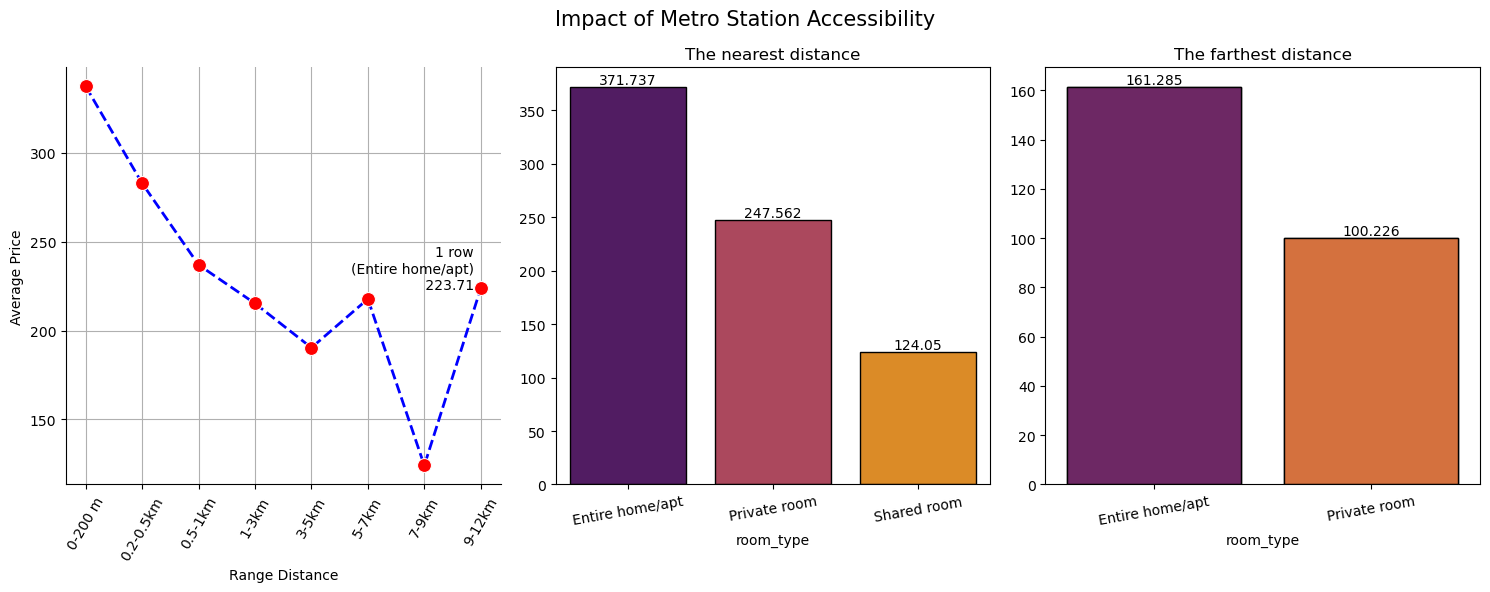

In [15]:
category= pd.concat([one,two,three,four,five, six, seven, eight])
category= pd.DataFrame(category.groupby(['category_dist'])['realSum'].mean()).reset_index()
seven1= seven.groupby(['room_type'])['realSum'].mean()
income= one.groupby('room_type')['realSum'].mean()

fig, (ax1,ax2,ax3)= plt.subplots(1,3,figsize= (15,6))
plt.suptitle('Impact of Metro Station Accessibility', fontsize= 15)
sns.lineplot(x= category['category_dist'], y= category['realSum'], ax=ax1, 
             color='blue', linewidth=2, linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
ax1.annotate(f'1 row\n(Entire home/apt)\n 223.71', (7, 225), xytext=(-5, -2), textcoords='offset points', 
             color='black', ha='right')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
#ax1.bar_label(ax1.containers[1])
for tick in ax1.get_xticklabels():
    tick.set_rotation(60)

ax1.grid(True)
ax1.set_xlabel('Range Distance')
ax1.set_ylabel('Average Price')

sns.barplot(x=income.index,y= income.values, ax= ax2, palette= 'inferno', edgecolor= 'black')
ax2.bar_label(ax2.containers[0])
ax2.set_title('The nearest distance')
for tick in ax2.get_xticklabels():
    tick.set_rotation(10)

sns.barplot(x=seven1.index,y= seven1.values, ax= ax3, palette= 'inferno', edgecolor= 'black')
seven1= seven.groupby(['room_type'])['realSum'].mean()
income= one.groupby('room_type')['realSum'].mean()

sns.barplot(x=seven1.index,y= seven1.values, ax= ax3, palette= 'inferno', edgecolor= 'black')
ax3.bar_label(ax3.containers[0])
ax3.set_title('The farthest distance')
for tick in ax3.get_xticklabels():
    tick.set_rotation(10)
plt.tight_layout();

insights:
- The distance that is close to the metro station has the highest average price compared to that which is far away. This happens because of the strategy of the host, which increases the rental price, apart from the fact that metro connectivity is a necessity based on access, disturbance, noise, crime rates, and pollution (reported in the JLTU Journal: Metro Station Inauguration).
- The dominance of the high average price is filled by the entire home/apartment room type because the room types tend to be larger and the host takes advantage of rental fees that will be more profitable in that type.
- Within 7-9 km, it proves to be cheaper. Whereas in the 9–12 km range, there is one type of entire home, which has a fairly high price even though the distance is far. This happens because it could be that the building is quite large and the tenants themselves don't want to be close to the metro station or have other interests.

**Mapping City**

In [16]:
ctr= {'Budapest': 0 , 'Lisbon': 1 , 'Paris': 2}
df['city']= df['city'].map(ctr)

### SPLIT DATA

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('city', axis= 1)
y = df['city']

## DATA PREPROCESSING

In [19]:
num= X.select_dtypes(include= 'number')

In [20]:
vif= pd.DataFrame()
vif["variables"] = num.columns
vif["VIF"] = [variance_inflation_factor(num.values, i).round(2) for i in range(num.shape[1])]
vif  

,variables,VIF
0,realSum,2.80
1,person_capacity,11.00
2,multi,1.69
3,biz,2.23
4,cleanliness_rating,187.89
5,guest_satisfaction_overall,218.02
6,bedrooms,5.39
7,dist,4.17
8,metro_dist,1.98
9,lng,1.62


In [21]:
mapping= {True: 1, False: 0}
stat= {'Weekend':1, 'Weekdays': 0}
rt= {'Entire home/apt': 2, 'Private room': 1,'Shared room': 0}

X['room_type']= X['room_type'].map(rt)
X['room_shared']= X['room_shared'].map(mapping)
X['room_private']= X['room_private'].map(mapping)
X['host_is_superhost']= X['host_is_superhost'].map(mapping)
X['status']= X['status'].map(stat)

In [22]:
X.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat,status
0,284.344597,2,0,0,5.0,0,1,0,9.0,95.0,1,0.532188,0.151416,19.05440,47.49377,0
1,63.448794,2,0,0,2.0,1,0,0,10.0,99.0,1,11.715751,3.737027,19.18097,47.43755,0
2,151.102129,2,0,0,5.0,1,0,1,10.0,97.0,1,0.786292,0.512534,19.06448,47.49989,1
3,178.596607,2,0,0,4.0,1,1,0,10.0,99.0,1,0.902166,0.344801,19.05900,47.50600,0
4,208.911031,1,0,1,2.0,0,0,0,2.0,20.0,1,5.174894,2.121191,19.04264,47.54444,0


In [23]:
X= X.drop(['lng', 'lat'], axis= 1)

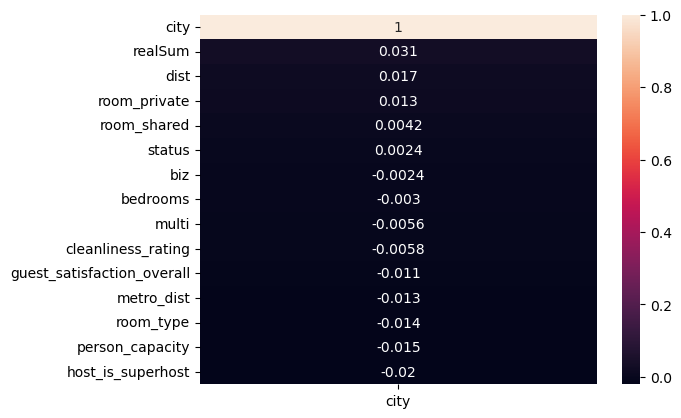

In [24]:
gabung= X.join(y)
gabung
sns.heatmap(gabung.corr()[['city']].sort_values(by= ['city'], ascending= False), annot = True);

In [25]:
X.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'status'],
      dtype='object')

### Drop Low correlation

In [26]:
X= X.drop(['room_shared','status', 'biz', 'bedrooms', 'multi', 'cleanliness_rating'], axis= 1)

In [27]:
from sklearn.model_selection import train_test_split

## LOGISTIC REGRESSION

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 0)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=logmodel.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=predictions))

Train data accuracy: 0.7959413754227734
Test data accuracy: 0.802104411169567


**insight**
- Test data accuracy sebesar 80.2% dengan kondisi nilai yang baik

In [34]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1166
           1       0.75      0.74      0.75      1750
           2       0.86      0.90      0.88      2026

    accuracy                           0.80      4942
   macro avg       0.79      0.79      0.79      4942
weighted avg       0.80      0.80      0.80      4942



**Accuracy of 80%, the model does not adequately explain the prediction results**

F1-Score:

1. model memprediksi Budapest dengan benar sebesar 74%.
2. model memprediksi Lisbon dengan benar sebesar 75%.
3. model memprediksi Paris dengan benar sebesar 88%.

In [36]:
imp_feat= logmodel.coef_[0]

In [37]:
feat= []
feat= pd.DataFrame(X.columns.values, columns= ['Feature'])
feat['score']= imp_feat
feat

,Feature,score
0,realSum,-0.015482
1,room_type,1.006821
2,room_private,-0.898929
3,person_capacity,0.441411
4,host_is_superhost,0.680029
5,guest_satisfaction_overall,0.003782
6,dist,-0.134155
7,metro_dist,0.609047


In [38]:
def cfm_viz(conf_matrix):
    plt.figure(figsize=(4,3))

    ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )

    ax.set_xlabel("Predicted", fontsize=9, labelpad=15)
    ax.xaxis.set_ticklabels(['Budapest','Lisbon', 'Paris'])

    ax.set_ylabel("Actual", fontsize=9, labelpad=15)
    ax.yaxis.set_ticklabels(['Budapest','Lisbon', 'Paris'])

    ax.set_title("Confusion Matrix Model", fontsize=14, pad=20)

    plt.show()

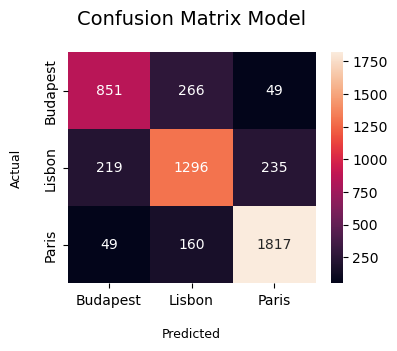

In [39]:
conf_matrix=confusion_matrix(y_test,predictions)
cfm_viz(conf_matrix)

insights:
- The predicted number of listings in Budapest : 851, Lisbon: 1296, Paris: 1817 listings.

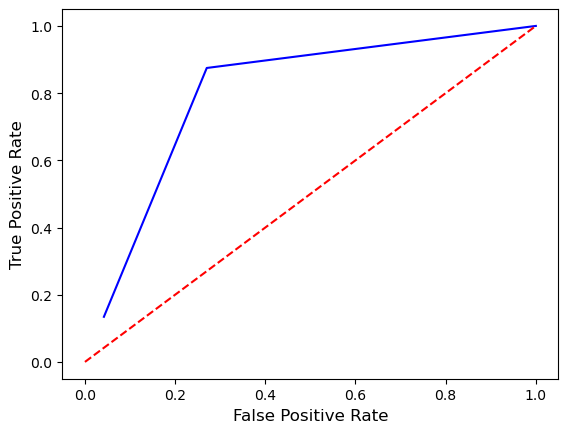

In [40]:
from sklearn.metrics import roc_auc_score
def predict_proba(x):
    return(np.random.uniform(0, 1, x.shape[0]))

def roc_curve(y, prob):
    tpr_list = []
    fpr_list = []
    threshold = np.linspace(1.1, 0, 10)
    for t in threshold:
        y_pred = np.zeros(y.shape[0])
        y_pred[prob >= t] = 1
        TN = y_pred[(y_pred == y) & (y == 0)].shape[0]
        TP = y_pred[(y_pred == y) & (y == 1)].shape[0]
        FP = y_pred[(y_pred != y) & (y == 0)].shape[0]
        FN = y_pred[(y_pred != y) & (y == 1)].shape[0]
        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)
        tpr_list.append(TPR)
        fpr_list.append(FPR)
    return fpr_list, tpr_list, threshold

#prob = predict_proba(x)
fpr, tpr, threshold = roc_curve(y_test, predictions)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)

plt.show()

- the curve is avoiding the baseline line or the transverse line. Good Curve to classify.

# RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
print(confusion_matrix(y_test,y_pred))

[[1012  128   26]
 [ 117 1561   72]
 [  23   76 1927]]


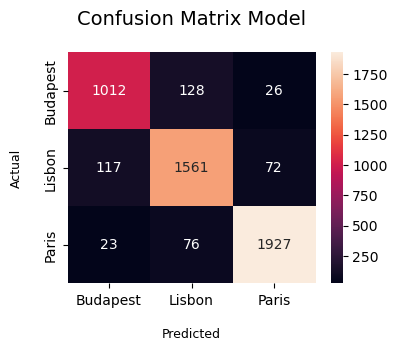

In [44]:
def cfm_viz(conf_matrix):
    plt.figure(figsize=(4,3))

    ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )

    ax.set_xlabel("Predicted", fontsize=9, labelpad=15)
    ax.xaxis.set_ticklabels(['Budapest','Lisbon', 'Paris'])

    ax.set_ylabel("Actual", fontsize=9, labelpad=15)
    ax.yaxis.set_ticklabels(['Budapest','Lisbon', 'Paris'])

    ax.set_title("Confusion Matrix Model", fontsize=14, pad=20)

    plt.show()
    
conf_matrix=confusion_matrix(y_test,y_pred)
cfm_viz(conf_matrix)    

insights:
- The predicted number of listings in Budapest : 1012, Lisbon: 1561, Paris: 1927 listings.

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1166
           1       0.88      0.89      0.89      1750
           2       0.95      0.95      0.95      2026

    accuracy                           0.91      4942
   macro avg       0.90      0.90      0.90      4942
weighted avg       0.91      0.91      0.91      4942



In [46]:
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=classifier.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.995230248894285
Test data accuracy: 0.9105625252934035


- Akurasi sebesar 91%, train accuracy: 99%

In [47]:
classifier.score(X_test,y_test)

0.9105625252934035

In [48]:
imp_feat=pd.Series(classifier.feature_importances_,index=X_train.columns.tolist())

In [49]:
imp_feat.sort_values(ascending=False)

realSum                       0.329925
metro_dist                    0.232529
dist                          0.229099
guest_satisfaction_overall    0.071395
person_capacity               0.065272
room_type                     0.033468
room_private                  0.019587
host_is_superhost             0.018724
dtype: float64

## Conclusion

1. The most number of listings The room type is "entire home/apt. Lisbon has the most total listings for business purposes compared to the other two cities. 
2. The room type with the highest cleanliness rating is "entire home/apt." The largest number of entire homes and apartments are in the city of Paris. 
3. Airbnb hosts in each city have more host status than superhosts, but it can be seen that the number of superhosts is predominantly owned by Budapest. 
4. Predominantly, prices on weekends tend to be higher in each city. 
5. The distance that is close to the metro station has the highest average price compared to that which is far away. The dominance of the high average price is filled by the entire home/apartment room type because it is more profitable in that type. A large number of trees can make the algorithm too slow and ineffective for real-time predictions. 
6. Logistic regression has an 80% accuracy, while random forest has a 91% accuracy but is overfit. Based on these data, the logistic regression model is better because the random forest results are overfit.
7. Based on this data classification, they tend to rely on precision because they want the results to be as correct as possible. This is a form of competitor analysis for each country.
$Precision = {TP \ \over (TP+FP)} $
